In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
path_name = "/Users/garciaj42/code/MLFinance/claude"

In [15]:
import sys
print(sys.path)
sys.path.insert(0, path_name)
sys.path.insert(0, "/Users/garciaj42/code/MLFinance")

['/Users/garciaj42/code/MLFinance', '/Users/garciaj42/code/MLFinance/claude', '/Users/garciaj42/code/MLFinance/claude/notebooks', '/Users/garciaj42/code/MLFinance/claude/notebooks', '/Users/garciaj42/code/MLFinance', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/opt/homebrew/lib/python3.9/site-packages', '/opt/homebrew/lib/python3.9/site-packages/IPython/extensions', '/opt/homebrew/lib/python3.9/site-packages/setuptools/_vendor', '/Users/garciaj42/.ipython']


In [16]:
lookback_days = 5 * 365

In [28]:
from market_indicator_data import fetch_market_indicators, fill_missing_data, generate_summary_stats, print_summary_stats
from datetime import datetime, timedelta

# Fetch the data
market_indicators_data, n_markets = fetch_market_indicators(datetime.now() -  timedelta(days=lookback_days))

Successfully fetched data for E-mini S&P 500 (ES=F)
Successfully fetched data for E-mini NASDAQ 100 (NQ=F)
Successfully fetched data for E-mini Russell 2000 (RTY=F)
Successfully fetched data for E-mini Dow (YM=F)
Successfully fetched data for Euro FX (6E=F)
Successfully fetched data for Japanese Yen (6J=F)
Successfully fetched data for British Pound (6B=F)
Successfully fetched data for Australian Dollar (6A=F)
Successfully fetched data for Canadian Dollar (6C=F)
Successfully fetched data for Mexican Peso (6M=F)
Successfully fetched data for New Zealand Dollar (6N=F)
Successfully fetched data for Swiss Franc (6S=F)
Successfully fetched data for Gold (GC=F)
Successfully fetched data for Silver (SI=F)
Successfully fetched data for Copper (HG=F)
Successfully fetched data for Platinum (PL=F)
Successfully fetched data for Palladium (PA=F)
Successfully fetched data for Crude Oil WTI (CL=F)
Successfully fetched data for Brent Crude (BZ=F)
Successfully fetched data for Natural Gas (NG=F)
Succes

In [34]:
market_indicators_data

,Date,Market,Open,High,Low,Close
0,2020-02-18 00:00:00-05:00,6A=F,0.672100,0.673700,0.667700,0.669000
1,2020-02-18 00:00:00-05:00,6B=F,1.305200,1.306500,1.298000,1.301000
2,2020-02-18 00:00:00-05:00,6C=F,0.754100,0.754100,0.754100,0.754100
3,2020-02-18 00:00:00-05:00,6E=F,1.085700,1.086950,1.080250,1.081150
4,2020-02-18 00:00:00-05:00,6J=F,0.009124,0.009133,0.009107,0.009115
...,...,...,...,...,...,...
32677,2025-02-12 00:00:00-05:00,YM=F,44699.000000,44733.000000,44188.000000,44462.000000
32678,2025-02-12 00:00:00-05:00,ZB=F,114.812500,115.187500,113.125000,113.406250
32679,2025-02-12 00:00:00-05:00,ZF=F,106.320312,106.476562,105.812500,105.875000
32680,2025-02-12 00:00:00-05:00,ZN=F,108.953125,109.156250,108.125000,108.265625


In [25]:
market_indicators_data.to_parquet(path=path_name + "/futures.parquet")



In [75]:
from technical_indicators import multi_indicators

df, cv, market_names = multi_indicators(df=market_indicators_data, n_markets=n_markets)

In [76]:
df

,ABS_RAT_252,ABS_SHIFT,COHERENCE,J_INDEX_MKT,J_INDEX_DOM_252,J_RS_OEX_15,J_FR_RS_OEX_100,J_DRS_IBM252_5,J_RSS_100,J_D_RSS_100,...,J_RS_LAGAD_252,J_RS_PS_252,J_RM_LEADEQ_252,J_RM_LAGEQ_252,J_RM_LEADAD_252,J_RM_LAGAD_252,J_RM_PS_252,J_CMA_OOS,J_LCMA_OOS,J_OOS_AVG
2020-02-18 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-19 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-20 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-21 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-24 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-06 00:00:00-05:00,86.884767,1.105611,41.589617,0.030629,0.009106,108.720379,1.0,0.00,114.641931,29.052888,...,0.316350,-0.813713,0.471594,-0.331912,0.480031,-0.323475,0.803506,-0.128605,-0.101425,-0.008437
2025-02-07 00:00:00-05:00,86.890255,1.101926,41.526394,0.028062,0.006539,107.798111,1.0,0.04,114.962642,3.762761,...,0.323267,-0.836220,0.470747,-0.321908,0.481155,-0.311500,0.792655,-0.130576,-0.108553,-0.010408
2025-02-10 00:00:00-05:00,86.895668,1.097446,41.620481,0.029461,0.007938,120.842920,1.0,0.16,115.418672,10.837150,...,0.319830,-0.818228,0.479757,-0.308580,0.483846,-0.304491,0.788337,-0.124257,-0.108670,-0.004089
2025-02-11 00:00:00-05:00,86.900670,1.092171,41.575775,0.030213,0.008689,134.689267,1.0,0.12,116.039785,1.381383,...,0.331836,-0.824218,0.476956,-0.291576,0.478781,-0.289751,0.768532,-0.121993,-0.112083,-0.001825


In [77]:
def center_scale_indicator(price_data, indicator_data):
    # Get price range
    price_mean = price_data.mean()
    price_std = price_data.std()
    
    # Standardize the indicator and scale it to price standard deviation
    scaled_indicator = (indicator_data - indicator_data.mean()) / indicator_data.std() * price_std + price_mean
    
    return scaled_indicator

import matplotlib.pyplot as plt
import pandas as pd

def plot_indicator(df: pd.DataFrame, indicator: str):
    # Create the visualization
    plt.figure(figsize=(12, 6))

    # Plot stock price
    plt.plot(df[indicator], label=indicator, color='blue', alpha=0.7)

    # Plot moving average
    # plt.plot(center_scale_indicator(df['close'], df[indicator]), label=indicator, color='red', alpha=0.5)

    # Customize the plot
    plt.title(f'ES MINI Stock Price with {indicator}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


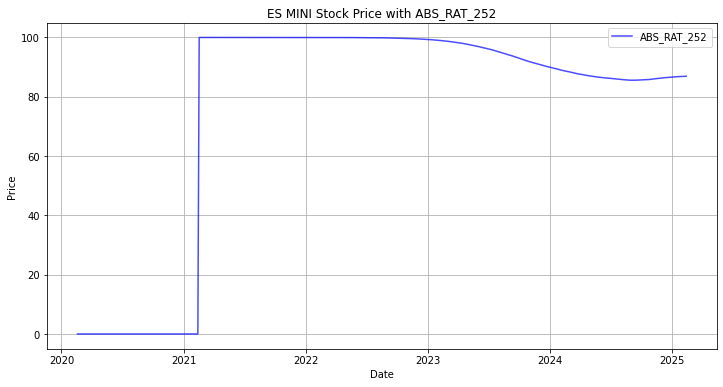

In [78]:
plot_indicator(df, 'ABS_RAT_252')

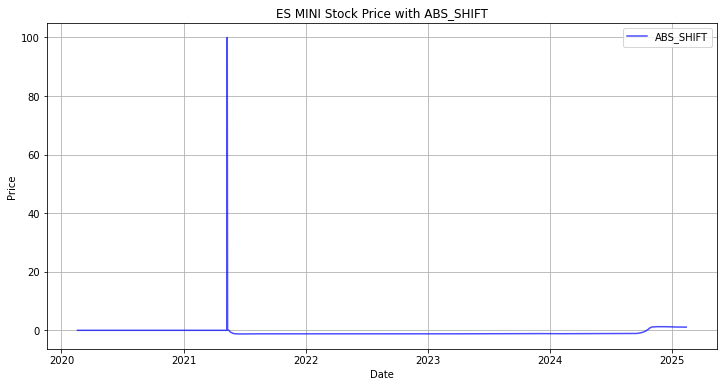

In [79]:
plot_indicator(df, 'ABS_SHIFT')
# VAR_ABS_SHIFT measures how much the short-term average deviates from the long-term average, normalized by the variability of the data. This helps identify significant shifts in market behavior while accounting for the natural volatility of the markets.

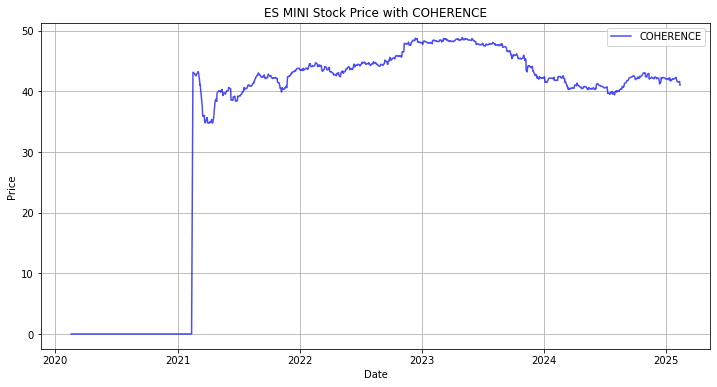

In [80]:
plot_indicator(df, 'COHERENCE')
# Higher coherence (output values) indicates markets are moving more in sync
# Lower coherence suggests markets are moving more independently

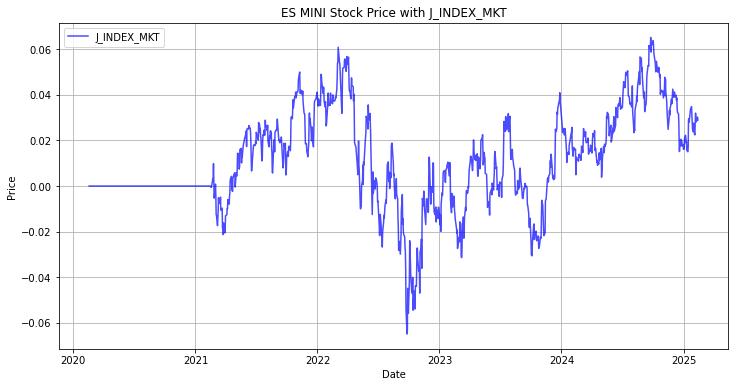

'Get cumulative market index returns.'

In [81]:
plot_indicator(df,'J_INDEX_MKT')
"""Get cumulative market index returns."""

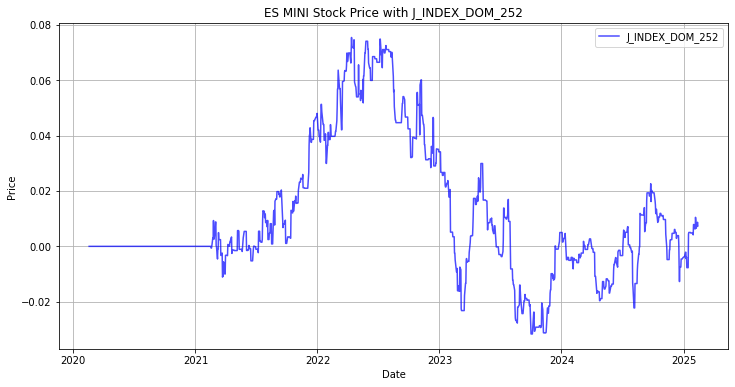

In [82]:
plot_indicator(df,'J_INDEX_DOM_252')

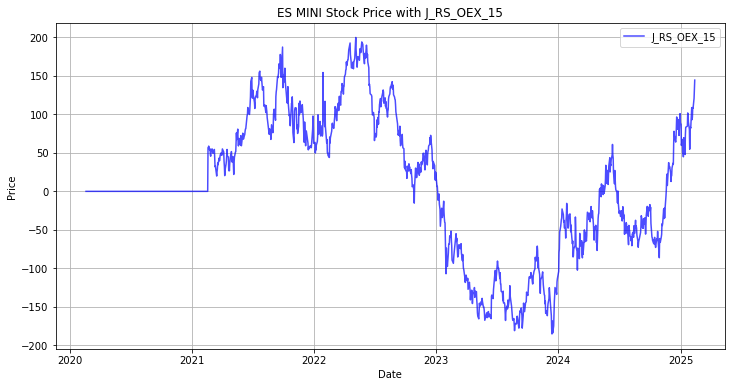

In [83]:
plot_indicator(df,'J_RS_OEX_15')

In [ ]:
plot_indicator(df,'J_FR_RS_OEX_100')

KeyError: 'J_FR_RS_OEX_15'

<Figure size 864x432 with 0 Axes>

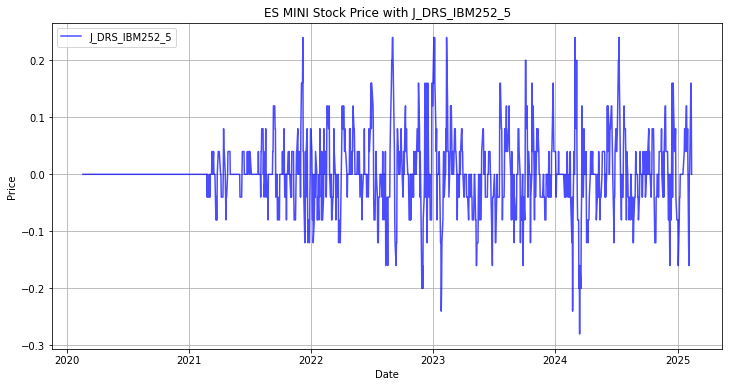

In [52]:
plot_indicator(df, 'J_DRS_IBM252_5')

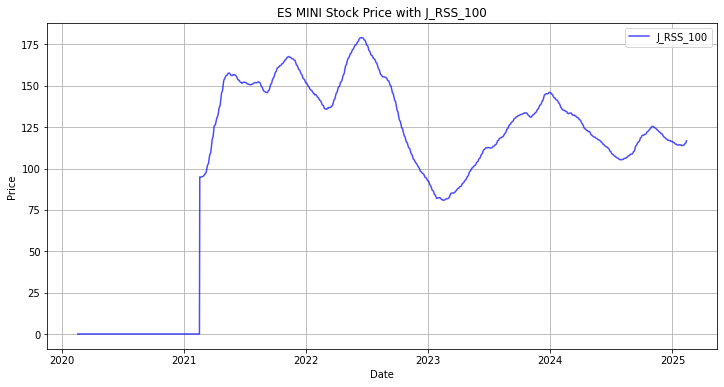

In [53]:
plot_indicator(df, 'J_RSS_100')

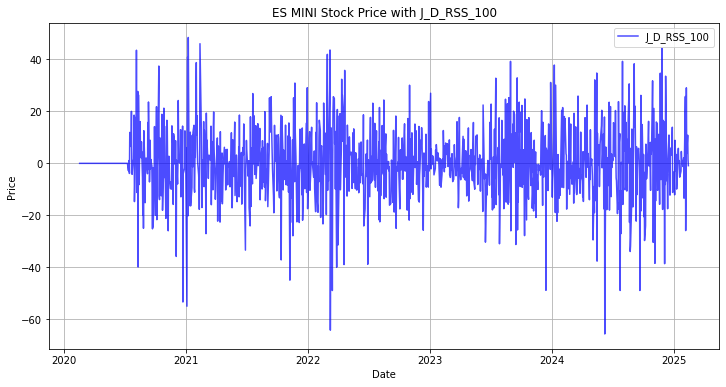

In [54]:
plot_indicator(df, 'J_D_RSS_100')
# """Get relative strength spread change."""

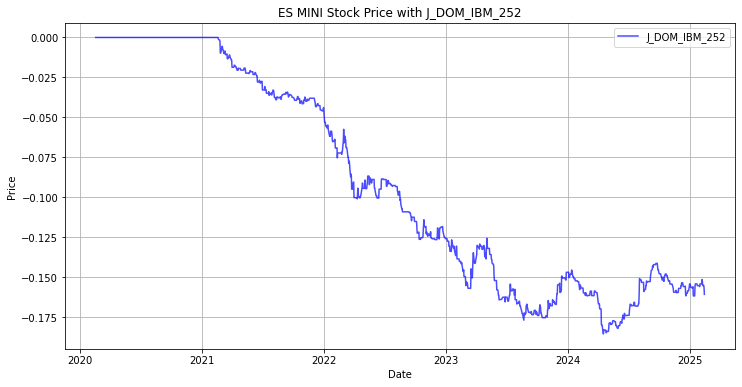

In [55]:
plot_indicator(df, 'J_DOM_IBM_252')

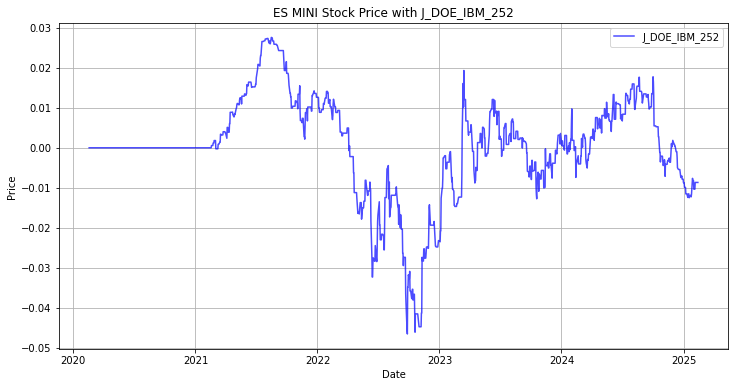

In [56]:
plot_indicator(df, 'J_DOE_IBM_252')

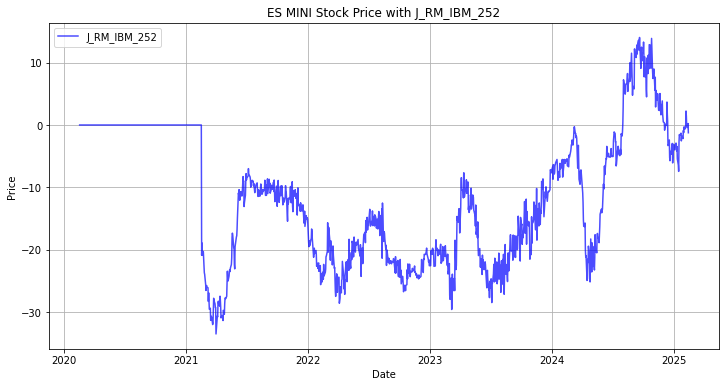

In [57]:
plot_indicator(df, 'J_RM_IBM_252')

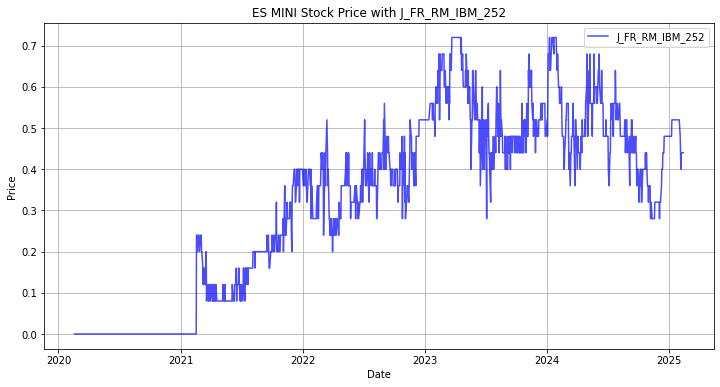

In [58]:
plot_indicator(df, 'J_FR_RM_IBM_252')

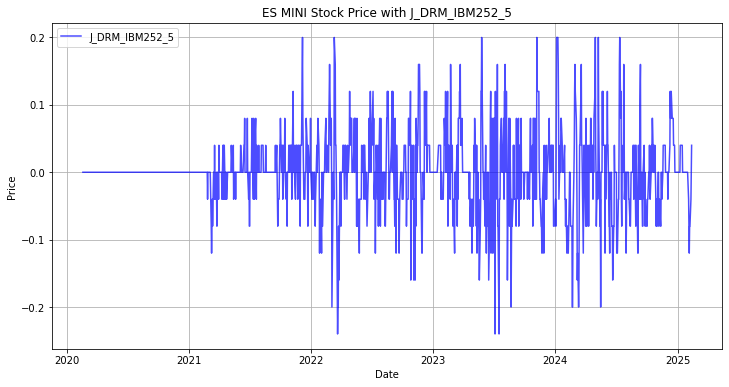

In [59]:
plot_indicator(df, 'J_DRM_IBM252_5')
# DRM: Delta (change in) Relative Momentum


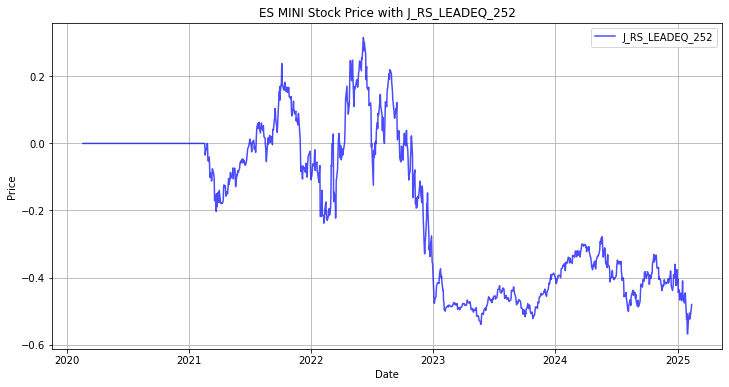

In [60]:
plot_indicator(df, 'J_RS_LEADEQ_252')

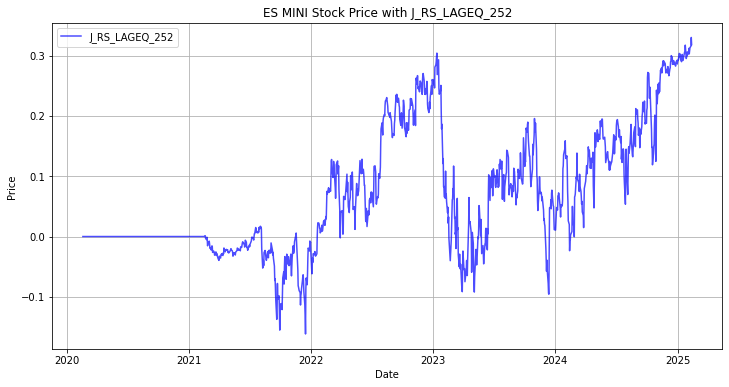

In [61]:
plot_indicator(df, 'J_RS_LAGEQ_252')
# """Get cumulative RS laggard returns."""
# rs_laggard represents the average returns of the weakest performing markets (the "laggards") based on relative strength rankings.

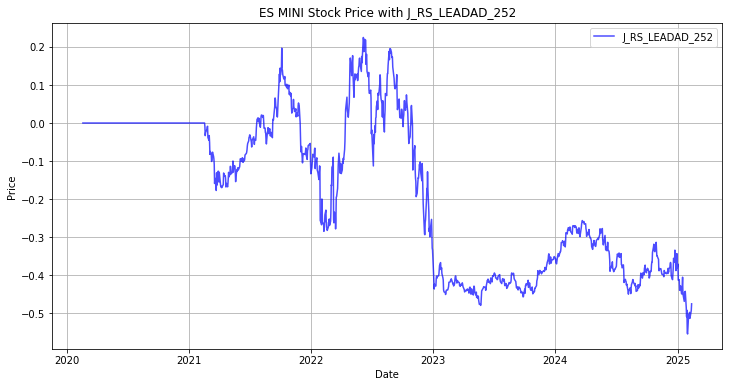

In [62]:
plot_indicator(df, 'J_RS_LEADAD_252')

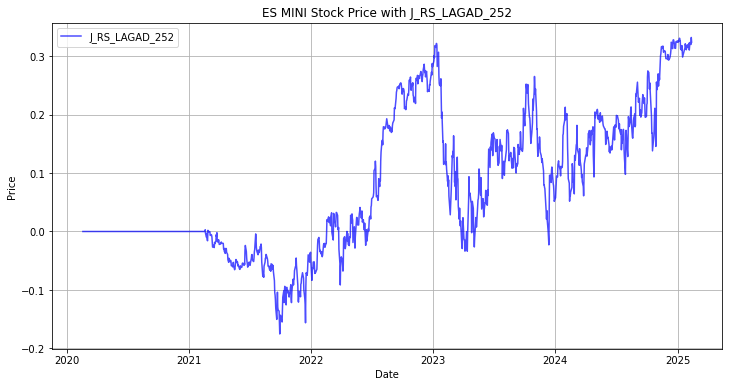

In [63]:
plot_indicator(df, 'J_RS_LAGAD_252')
"""Get cumulative RS laggard advantage over market."""
# self.rs_laggard[i-1] - self.oos_avg[i-1]

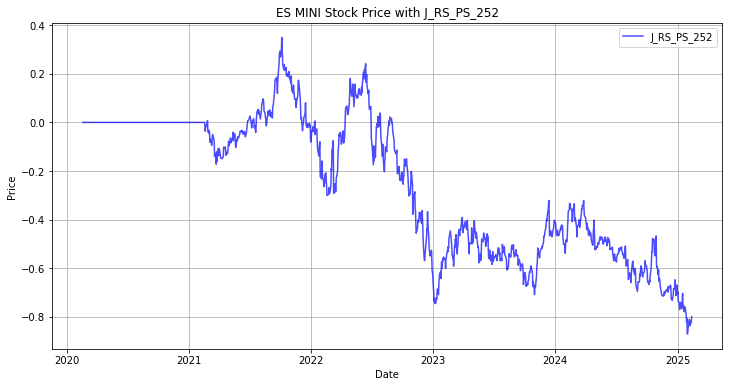

In [64]:
plot_indicator(df, 'J_RS_PS_252')
"""Get cumulative RS performance spread."""
# Difference between leaders and laggards. cumsum += self.rs_leader[i-1] - self.rs_laggard[i-1]

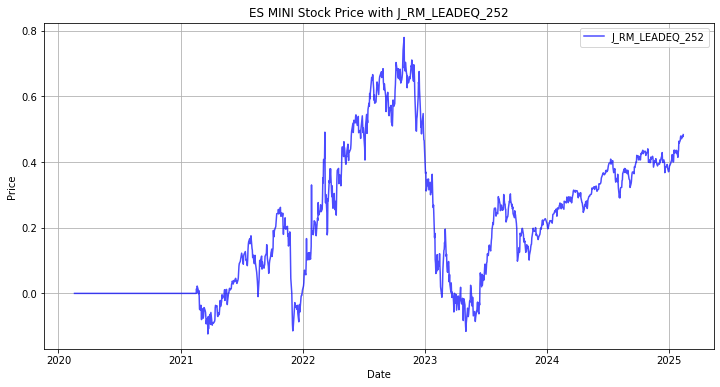

In [65]:
plot_indicator(df, 'J_RM_LEADEQ_252')

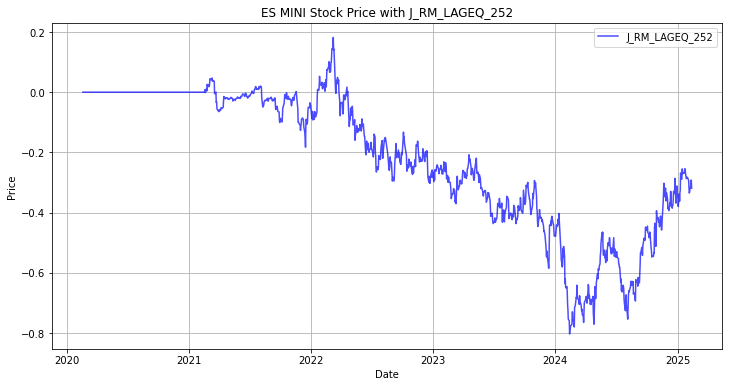

In [66]:
plot_indicator(df, 'J_RM_LAGEQ_252')
# Shows pure cumulative returns of laggards (rm_laggard)
# Tracks absolute performance of lagging stocks, not compared to anything

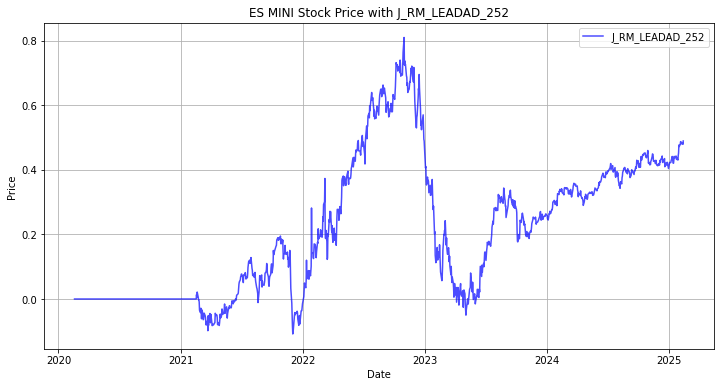

In [67]:
plot_indicator(df, 'J_RM_LEADAD_252')

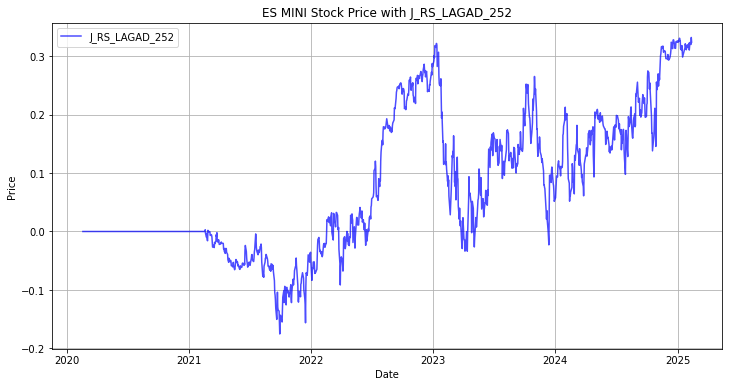

In [69]:
plot_indicator(df, 'J_RS_LAGAD_252')
#  "Relative Strength (RS) Laggard Advantage" - essentially tracking how the lagging stocks are performing compared to the market average (oos_avg) over a 252-day period

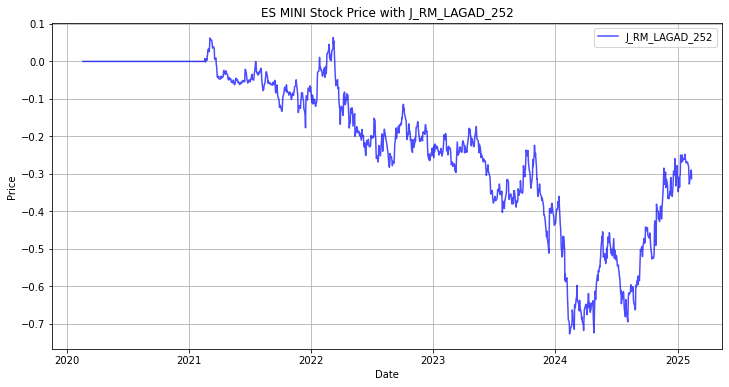

In [68]:
plot_indicator(df, 'J_RM_LAGAD_252')

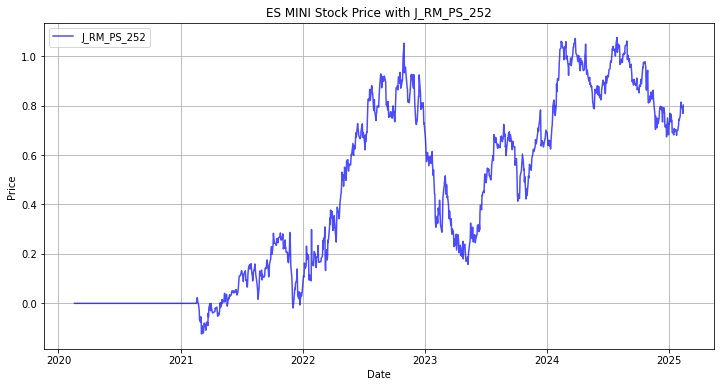

In [70]:
plot_indicator(df, 'J_RM_PS_252')
# "Performance Spread" (PS) calculation between leading and lagging relative momentum (RM) indicators

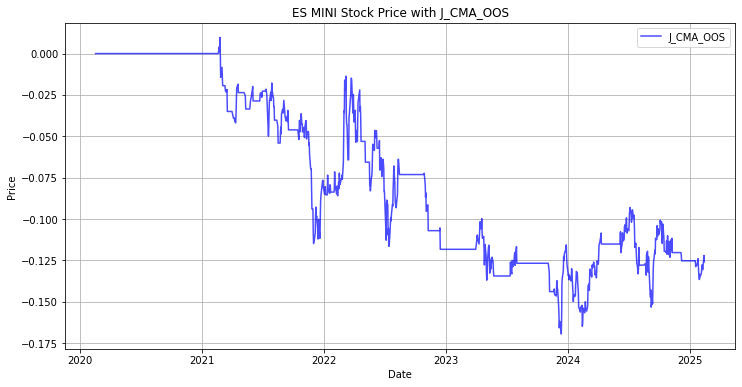

In [71]:
plot_indicator(df, 'J_CMA_OOS')

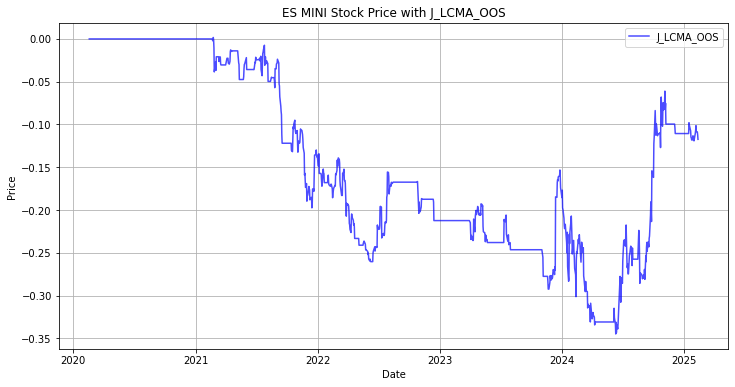

In [72]:
plot_indicator(df, 'J_LCMA_OOS')

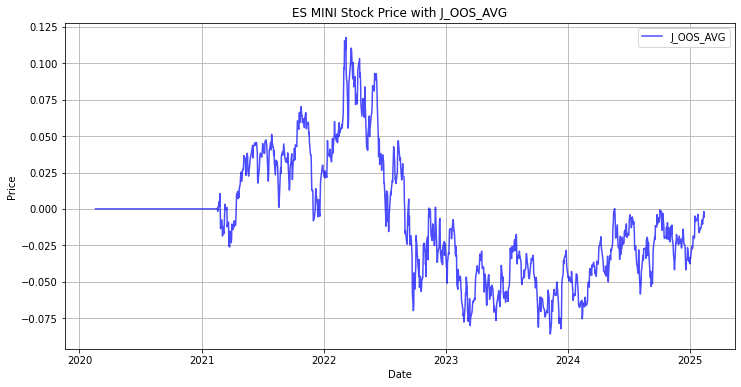

In [73]:
plot_indicator(df, 'J_OOS_AVG')

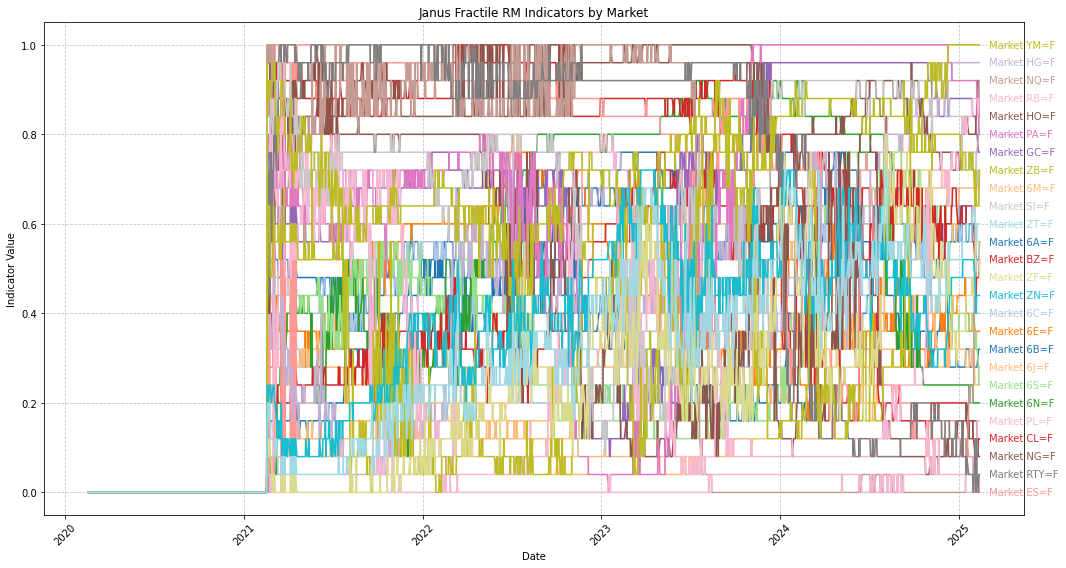

In [85]:
def plot_market_indicators(out_df: pd.DataFrame, n_markets: int):
    """
    Plot J_FR_RM indicators for multiple markets with end labels.
    
    Parameters:
    -----------
    out_df : pd.DataFrame
        DataFrame containing the indicators
    n_markets : int
        Number of markets to plot
    """
    plt.figure(figsize=(15, 8))
    
    # Get all J_FR_RM columns
    rm_columns = [f'J_FR_RM_{i}_252' for i in range(n_markets)]
    
    # Plot each market's line
    for i, col in enumerate(rm_columns):
        values = out_df[col].values
        dates = out_df.index
        
        # Generate a distinct color for each line
        color = plt.cm.tab20(i/n_markets)
        
        # Plot the line
        plt.plot(dates, values, color=color, label=f'Market {market_names[i]}')
        
        # Add label at the end of the line
        last_date = dates[-1]
        last_value = values[-1]
        plt.annotate(f'Market {market_names[i]}', 
                    xy=(last_date, last_value),
                    xytext=(10, 0),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    color=color)

    # Customize the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('Janus Fractile RM Indicators by Market')
    plt.xlabel('Date')
    plt.ylabel('Indicator Value')
    
    # Rotate x-axis dates for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
plot_market_indicators(out_df=df, n_markets=n_markets)